In [24]:
import sys
import numpy as np
from numpy import pi, sqrt, inf, log
from ecell4 import *


#def exprnd(mu):
#    return log(1.0 / w.rng().uniform(0, 1)) * mu

def exprnd(mu):
    return np.random.exponential(mu)  

L = 100
voxel_radius = 0.005
D = 1
rng = GSLRandomNumberGenerator()
rng.seed(1)
#if len(sys.argv) > 1:
#    rng.seed(int(sys.argv[1]))

w = spatiocyte.create_spatiocyte_world_cell_list_impl(ones() * L, voxel_radius, Integer3(3, 3, 3), rng)

def singlerun(dt, Pacc):
    assert Pacc  <= 1

    coord1 = w.position2coordinate(ones() * L * 0.5)
    coord2 = w.get_neighbor(coord1, 0)

    dt = dt
    t, nsteps = 0.0, 0
    while nsteps < maxstep:
        rnd = w.rng().uniform_int(0, 11)
        newcoord = w.get_neighbor(coord2, rnd)
        if newcoord == coord1:
            #if Pacc >= w.rng().uniform(0, 1):
                return True
        else:
            coord2 = newcoord
        t += dt
        nsteps += 1
    return False

kD = 4 * pi * (2 * voxel_radius) * D
ka_factor = 0.1  # 100.0
ka = kD * ka_factor
Pacc = 1#ka / (6 * sqrt(2) * D * voxel_radius)
dt = (4 * voxel_radius * voxel_radius) / (6 * D)

maxstep= 1#int(float(L*0.5/voxel_radius))
ntrials = 1000000
res = [singlerun(dt, Pacc) for _ in range(ntrials)]
#res = [singlerun3(dt, Pacc) for _ in range(ntrials)]
#print 'preb',1./(1+1./ka_factor)
print float(res.count(True)) / len(res)
#times = np.array([i for i in res if i != None])
#print float(len(times))/ntrials
#print float(len(times[times<dt]))/ntrials
print 1./12

0.083271
0.0833333333333


In [23]:
a=1./12
print 0.083208-a/a

-0.916792


In [11]:
R=0.256318
print 1./(1+(1./R-1)/Pacc)

0.0926296515259


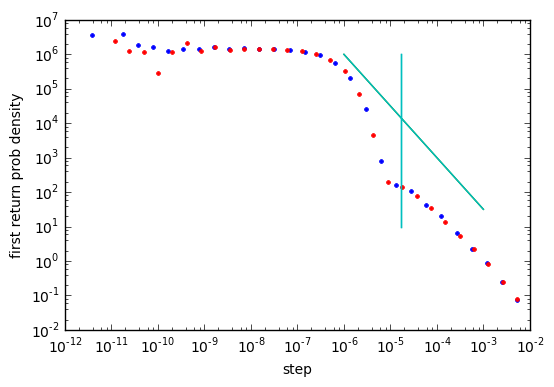

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
def plothist(times):
    hist, bin_edges = np.histogram(times,bins=np.logspace(np.log10(min(times)),np.log10(max(times)),30))
    tt = 0.5*(bin_edges[:-1]+bin_edges[1:])
    binwid = -(bin_edges[:-1]-bin_edges[1:])
    ft = np.array([float(h)/ntrials/b for h,b in zip(hist,binwid)])
    plt.loglog(tt,ft,'.')
    z = lambda x: 1e-3*(x**-1.5) #t^(-0.5)
    #w = lambda x: 0.1*(x**-0.5) #t^(-0.5)
    plt.plot(np.logspace(-6,-3,50),z(np.logspace(-6,-3,50)),label='p ~ t^-1.5')
    #plt.plot(np.logspace(-6,1,50),w(np.logspace(-6,1,50)),'r',label='p ~ t^-0.5')
    prange = np.logspace(1,6,10)
    plt.plot([dt]*len(prange),prange,'c')
    plt.xlabel('step')
    plt.ylabel('first return prob density')
    #totalsum = sum(ft*binwid)
    
plothist(times)
plothist(times2)

In [17]:
ka_factor = 1.  # 100.0
ka = kD * ka_factor
Pa = ka / (6 * sqrt(2) * D * voxel_radius)
print Pa,dt
print (1-np.exp(-(Pa+11)/12))

68.1242050518 1.66666666667e-05
0.998631012351


In [16]:
1. / (6 * sqrt(2) * D * voxel_radius)

23.570226039551578

In [25]:
for i in range(1000000):
    z=w.rng().uniform(1e-12, 1)
    k=1./z
    if (z==0): print z

In [32]:
P=np.array([0.5045,0.9085,0.991])
1./(1./P-1)

array([   1.01816347,    9.92896175,  110.11111111])

In [46]:
1-(((1./0.256318)-1)/12)

0.758216356244977

In [59]:
100./0.01

10000.0

In [9]:
50/0.005

10000.0